# Exploratory Data Analysis


In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import preprocessing
from matplotlib import pyplot as plt

# Reading the CSV file
df = pd.read_csv("./Dataset/Dallas_weather_data.csv")

# Printing top 5 rows
df.head()


name    datetime  tempmax  tempmin  temp  \
0  Dallas, TX, United States  2024-01-01     48.5     32.0  39.9   
1  Dallas, TX, United States  2024-01-02     47.7     32.6  40.2   
2  Dallas, TX, United States  2024-01-03     54.3     41.6  45.7   
3  Dallas, TX, United States  2024-01-04     57.5     36.6  47.1   
4  Dallas, TX, United States  2024-01-05     50.4     44.0  46.9   

   feelslikemax  feelslikemin  feelslike   dew  humidity  ...  solarenergy  \
0          45.9          22.6       34.6  30.4      69.7  ...         16.2   
1          47.7          29.7       37.9  33.3      77.5  ...          8.3   
2          54.3          37.4       44.8  40.0      81.3  ...         11.6   
3          57.5          35.8       46.7  39.3      76.7  ...         14.9   
4          50.4          38.8       43.9  43.4      87.8  ...          3.7   

   uvindex  severerisk              sunrise               sunset  moonphase  \
0        8          10  2024-01-01T07:29:43  2024-01-01T17:31:46       0.69   
1        7          10  2024-01-02T07:29:55  2024-01-02T17:32:30       0.72   
2        7          10  2024-01-03T07:30:05  2024-01-03T17:33:16       0.75   
3        8          10  2024-01-04T07:30:14  2024-01-04T17:34:03       0.78   
4        2          10  2024-01-05T07:30:21  2024-01-05T17:34:50       0.81   

               conditions                                        description  \
0                   Clear               Clear conditions throughout the day.   
1  Rain, Partially cloudy        Partly cloudy throughout the day with rain.   
2  Rain, Partially cloudy  Partly cloudy throughout the day with morning ...   
3        Partially cloudy                  Partly cloudy throughout the day.   
4          Rain, Overcast  Cloudy skies throughout the day with early mor...   

                icon                                           stations  
0          clear-day  F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7...  
1               rain  F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7...  
2               rain  F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7...  
3  partly-cloudy-day  F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7...  
4               rain  F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7...  

[5 rows x 33 columns]

## Summary Statistics

### Shape

In [3]:
df.shape

(366, 33)

### Data Types

In [4]:
df.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth             int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk            int64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        117 non-null    object 
 14  snow              366 non-null    float64
 15  snowdepth         366 non-null    int64  
 16  windgust          366 non-null    float64
 1

### Duplicates

In [6]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [name, datetime, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, severerisk, sunrise, sunset, moonphase, conditions, description, icon, stations]
Index: []

[0 rows x 33 columns]

### Describe

In [7]:
df.describe()

tempmax     tempmin        temp  feelslikemax  feelslikemin  \
count  366.000000  366.000000  366.000000    366.000000    366.000000   
mean    78.699180   60.439617   69.224044     80.247541     59.536612   
std     15.368373   15.260602   15.135806     17.799616     17.690415   
min     23.200000   10.700000   15.500000     10.100000     -3.900000   
25%     68.100000   48.850000   58.925000     68.100000     47.700000   
50%     81.450000   63.700000   72.650000     81.200000     63.700000   
75%     91.050000   73.475000   81.250000     94.275000     73.475000   
max    104.700000   83.200000   93.600000    110.800000     88.700000   

        feelslike         dew    humidity      precip  precipprob  ...  \
count  366.000000  366.000000  366.000000  366.000000  366.000000  ...   
mean    69.736066   55.220219   64.364208    0.119732   31.967213  ...   
std     17.667156   15.312014   13.929649    0.364884   46.698790  ...   
min      2.200000    0.700000   32.000000    0.000000    0.000000  ...   
25%     58.825000   45.525000   54.425000    0.000000    0.000000  ...   
50%     72.650000   58.700000   62.750000    0.000000    0.000000  ...   
75%     83.500000   68.175000   74.150000    0.018750  100.000000  ...   
max     99.400000   75.600000   98.800000    3.250000  100.000000  ...   

        windspeed     winddir  sealevelpressure  cloudcover  visibility  \
count  366.000000  366.000000        366.000000  366.000000  366.000000   
mean    13.786612  163.875137       1015.157377   45.054372    9.423770   
std      4.289453   88.720803          5.932348   29.251141    1.026209   
min      4.600000    1.400000        999.900000    0.000000    2.400000   
25%     10.800000  108.050000       1011.000000   19.325000    9.500000   
50%     13.100000  157.300000       1014.700000   41.300000    9.900000   
75%     16.200000  186.925000       1018.175000   67.775000    9.900000   
max     30.700000  359.500000       1034.900000  100.000000    9.900000   

       solarradiation  solarenergy     uvindex  severerisk   moonphase  
count      366.000000   366.000000  366.000000  366.000000  366.000000  
mean       199.790164    17.264754    8.254098   25.942623    0.488087  
std         85.092443     7.345112    2.590483   24.706485    0.292170  
min          0.500000     0.000000    0.000000   10.000000    0.000000  
25%        143.900000    12.425000    8.000000   10.000000    0.250000  
50%        210.050000    18.200000   10.000000   10.000000    0.500000  
75%        266.850000    23.000000   10.000000   30.000000    0.750000  
max        342.000000    29.700000   10.000000  100.000000    0.980000  

[8 rows x 24 columns]

### Null check

In [8]:

# check for any null values

df.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          249
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            0
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [9]:
# Convert datetime column to proper datetime format
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month

In [10]:
df['month'].value_counts()

month
1     31
3     31
5     31
7     31
8     31
10    31
12    31
4     30
6     30
9     30
11    30
2     29
Name: count, dtype: int64

In [11]:
column_to_move = df.pop("month")


df.insert(2, "month", column_to_move)

In [12]:
df.head()

name   datetime  month  tempmax  tempmin  temp  \
0  Dallas, TX, United States 2024-01-01      1     48.5     32.0  39.9   
1  Dallas, TX, United States 2024-01-02      1     47.7     32.6  40.2   
2  Dallas, TX, United States 2024-01-03      1     54.3     41.6  45.7   
3  Dallas, TX, United States 2024-01-04      1     57.5     36.6  47.1   
4  Dallas, TX, United States 2024-01-05      1     50.4     44.0  46.9   

   feelslikemax  feelslikemin  feelslike   dew  ...  solarenergy  uvindex  \
0          45.9          22.6       34.6  30.4  ...         16.2        8   
1          47.7          29.7       37.9  33.3  ...          8.3        7   
2          54.3          37.4       44.8  40.0  ...         11.6        7   
3          57.5          35.8       46.7  39.3  ...         14.9        8   
4          50.4          38.8       43.9  43.4  ...          3.7        2   

   severerisk              sunrise               sunset  moonphase  \
0          10  2024-01-01T07:29:43  2024-01-01T17:31:46       0.69   
1          10  2024-01-02T07:29:55  2024-01-02T17:32:30       0.72   
2          10  2024-01-03T07:30:05  2024-01-03T17:33:16       0.75   
3          10  2024-01-04T07:30:14  2024-01-04T17:34:03       0.78   
4          10  2024-01-05T07:30:21  2024-01-05T17:34:50       0.81   

               conditions                                        description  \
0                   Clear               Clear conditions throughout the day.   
1  Rain, Partially cloudy        Partly cloudy throughout the day with rain.   
2  Rain, Partially cloudy  Partly cloudy throughout the day with morning ...   
3        Partially cloudy                  Partly cloudy throughout the day.   
4          Rain, Overcast  Cloudy skies throughout the day with early mor...   

                icon                                           stations  
0          clear-day  F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7...  
1               rain  F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7...  
2               rain  F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7...  
3  partly-cloudy-day  F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7...  
4               rain  F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7...  

[5 rows x 34 columns]

In [13]:
df.dtypes

name                        object
datetime            datetime64[ns]
month                        int32
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                   int64
precipcover                float64
preciptype                  object
snow                       float64
snowdepth                    int64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
severerisk                   int64
sunrise                     object
sunset              

## Checking important features

In [14]:
# All entries have snow depth of 0
df['snowdepth'].value_counts()

snowdepth
0    366
Name: count, dtype: int64

In [15]:
# dropping snow depth as no useful feature
df.drop(['snowdepth'], axis=1, inplace=True)

In [16]:
#dropping perciptype as almost 70% of values are missing
df.drop(['preciptype'], axis=1, inplace=True)

In [17]:
# dropping stations
df.drop(['stations'], axis=1, inplace=True)

In [18]:
# dropping name
df.drop(['name'], axis=1, inplace=True)

In [19]:
# dropping icon
df.drop(['icon'], axis=1, inplace=True)

In [20]:
pd.set_option('display.max_columns', None)
df.head()

datetime  month  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0 2024-01-01      1     48.5     32.0  39.9          45.9          22.6   
1 2024-01-02      1     47.7     32.6  40.2          47.7          29.7   
2 2024-01-03      1     54.3     41.6  45.7          54.3          37.4   
3 2024-01-04      1     57.5     36.6  47.1          57.5          35.8   
4 2024-01-05      1     50.4     44.0  46.9          50.4          38.8   

   feelslike   dew  humidity  precip  precipprob  precipcover  snow  windgust  \
0       34.6  30.4      69.7   0.000           0         0.00   0.0      21.0   
1       37.9  33.3      77.5   0.460         100        29.17   0.0      16.8   
2       44.8  40.0      81.3   0.001         100         4.17   0.0      12.5   
3       46.7  39.3      76.7   0.000           0         0.00   0.0      25.3   
4       43.9  43.4      87.8   0.323         100        16.67   0.0      24.2   

   windspeed  winddir  sealevelpressure  cloudcover  visibility  \
0       12.5      3.9            1027.1        11.1         9.9   
1       10.1     88.3            1024.3        65.3         9.0   
2        7.6    345.2            1021.4        63.5         9.3   
3       15.9    120.0            1019.6        39.4         7.5   
4       15.3    119.4            1011.8        92.8         9.3   

   solarradiation  solarenergy  uvindex  severerisk              sunrise  \
0           187.7         16.2        8          10  2024-01-01T07:29:43   
1            96.6          8.3        7          10  2024-01-02T07:29:55   
2           133.9         11.6        7          10  2024-01-03T07:30:05   
3           174.2         14.9        8          10  2024-01-04T07:30:14   
4            43.5          3.7        2          10  2024-01-05T07:30:21   

                sunset  moonphase              conditions  \
0  2024-01-01T17:31:46       0.69                   Clear   
1  2024-01-02T17:32:30       0.72  Rain, Partially cloudy   
2  2024-01-03T17:33:16       0.75  Rain, Partially cloudy   
3  2024-01-04T17:34:03       0.78        Partially cloudy   
4  2024-01-05T17:34:50       0.81          Rain, Overcast   

                                         description  
0               Clear conditions throughout the day.  
1        Partly cloudy throughout the day with rain.  
2  Partly cloudy throughout the day with morning ...  
3                  Partly cloudy throughout the day.  
4  Cloudy skies throughout the day with early mor...

In [21]:
numerical_ftrs = df.select_dtypes(include=np.number).columns.tolist()
categorical_ftrs = df.select_dtypes(include='object').columns.tolist()



### Numerical Features

In [22]:
numerical_ftrs

['month',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'precipprob',
 'precipcover',
 'snow',
 'windgust',
 'windspeed',
 'winddir',
 'sealevelpressure',
 'cloudcover',
 'visibility',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'severerisk',
 'moonphase']

### Categorical Features

In [23]:
categorical_ftrs

['sunrise', 'sunset', 'conditions', 'description']

Temperature ranges

In [24]:
# Check for unrealistic values
print("Temperature range:", df['tempmin'].min(), "to", df['tempmax'].max())
print("Humidity range:", df['humidity'].min(), "% to", df['humidity'].max(), "%")

Temperature range: 10.7 to 104.7
Humidity range: 32.0 % to 98.8 %


## Distribution of Numerical Features

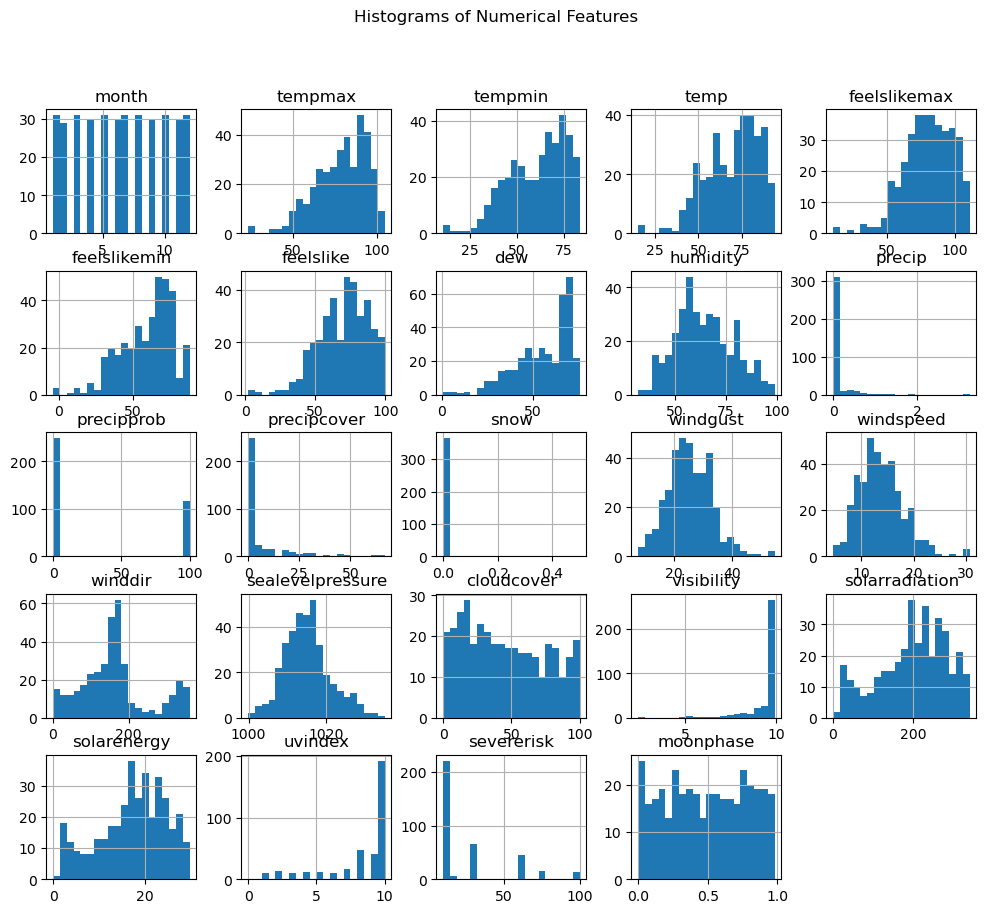

In [25]:
# Distribution of numerical features

df[numerical_ftrs].hist(figsize=(12, 10), bins=20,)
plt.suptitle("Histograms of Numerical Features")
plt.show()

## Distribution of Average Temperature

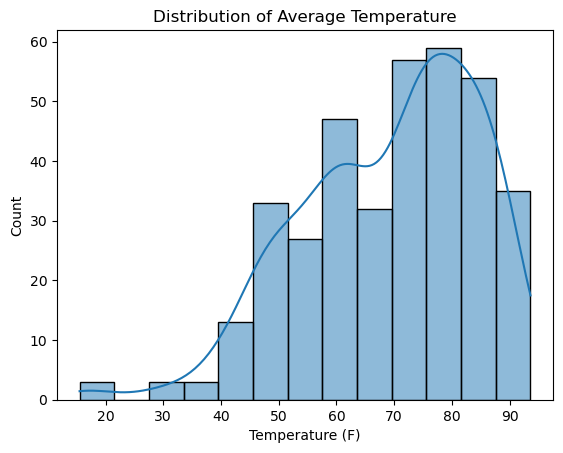

In [26]:
# Temperature Distribution
sns.histplot(df['temp'], kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Temperature (F)')
plt.show()

## Distribution of Humidity

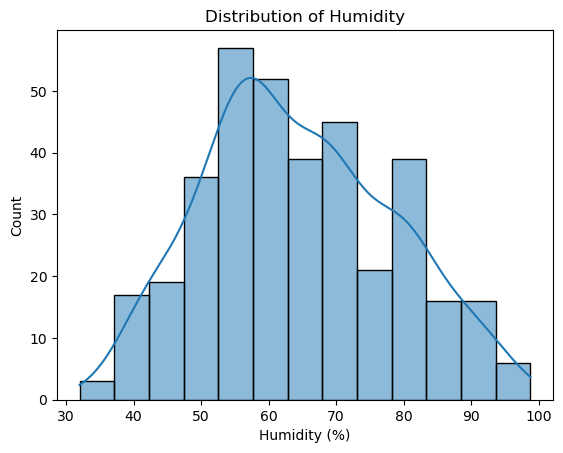

In [27]:
# Humidity Distribution
sns.histplot(df['humidity'], kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity (%)')
plt.show()

## Temperature Trends over time

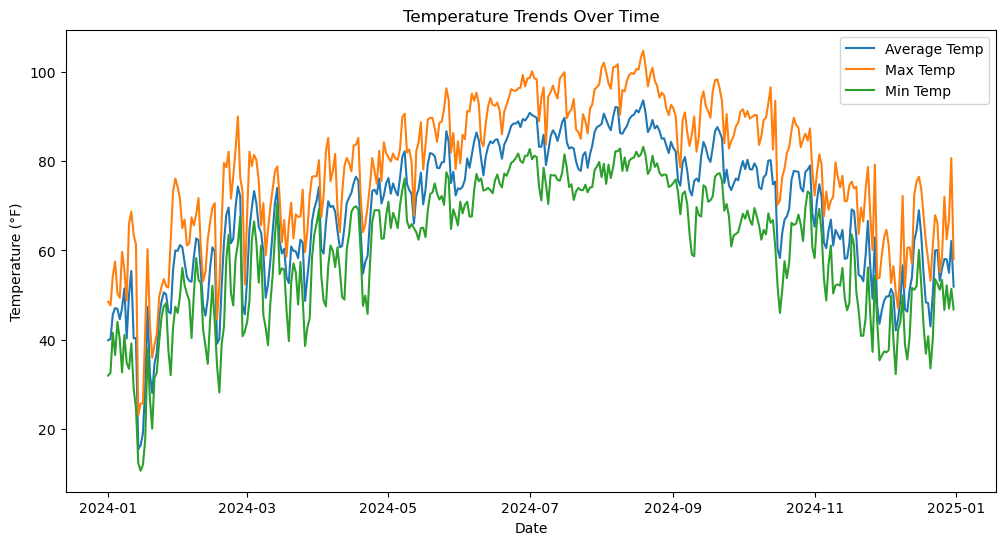

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='datetime', y='temp', label='Average Temp')
sns.lineplot(data=df, x='datetime', y='tempmax', label='Max Temp')
sns.lineplot(data=df, x='datetime', y='tempmin', label='Min Temp')
plt.title('Temperature Trends Over Time')
plt.ylabel('Temperature (°F)')
plt.xlabel('Date')
plt.legend()
plt.show()

## Temperature and Dew Point over Time

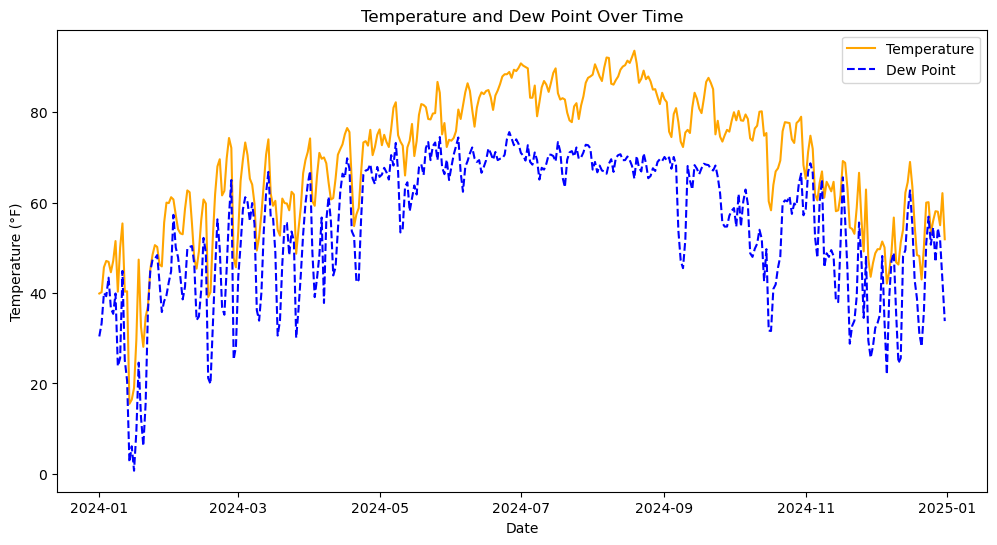

In [29]:
# Markdown: Temperature and dew point over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['datetime'], y=df['temp'], label='Temperature', color='orange')
sns.lineplot(x=df['datetime'], y=df['dew'], label='Dew Point', color='blue', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Temperature and Dew Point Over Time")
plt.legend()
plt.show()


##

## Wind Direction vs Windspeed

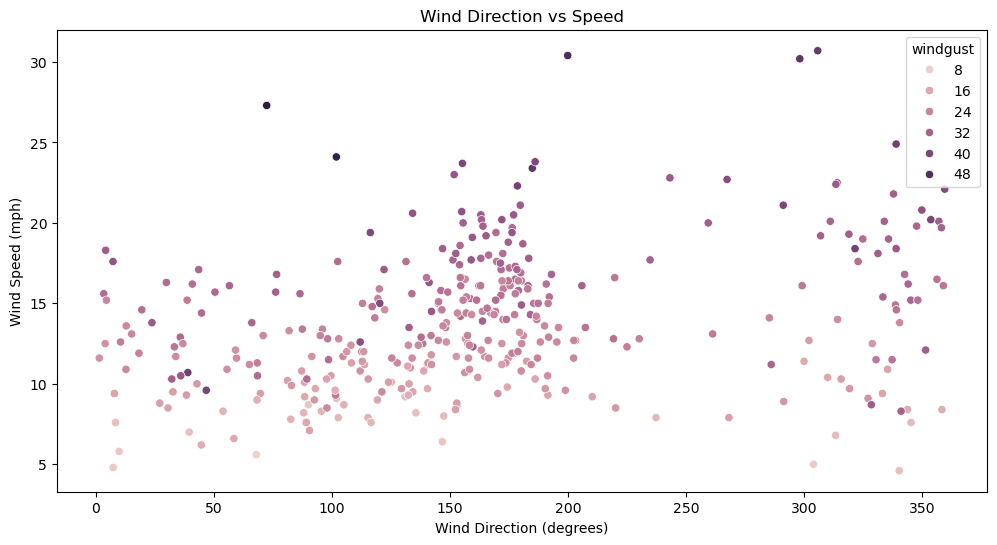

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='winddir', y='windspeed', hue='windgust')
plt.title('Wind Direction vs Speed')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Tempeature vs Humidity

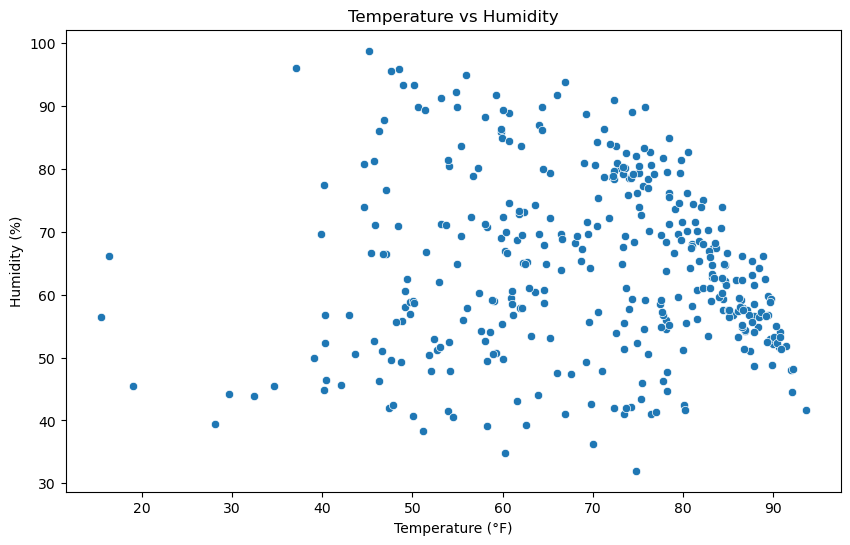

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='humidity')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°F)')
plt.ylabel('Humidity (%)')
plt.show()

## Cloud Cover vs Solar Radiation

How does cloud cover affect solar radiation?

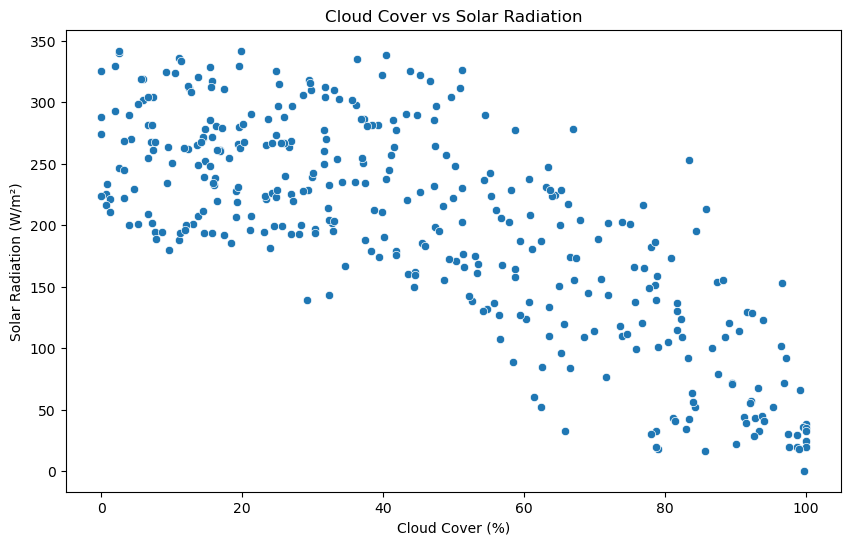

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cloudcover', y='solarradiation')
plt.title('Cloud Cover vs Solar Radiation')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Solar Radiation (W/m²)')
plt.show()

## PairPlot

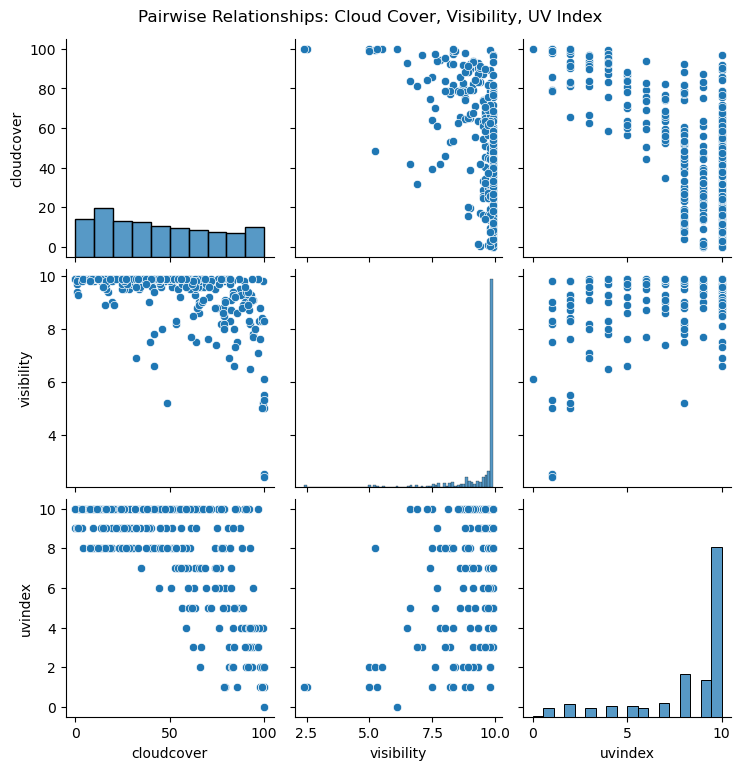

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
subset = df[['cloudcover', 'visibility', 'uvindex']].dropna()

# Pairplot
sns.pairplot(subset, kind='scatter', diag_kind='hist')
plt.suptitle("Pairwise Relationships: Cloud Cover, Visibility, UV Index", y=1.02)
plt.show()


## Temperature Trend By Month

C:\Users\Uzumaki\AppData\Local\Temp\ipykernel_34460\2699008685.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['month'], y=df['temp'], estimator='mean', ci=None, marker='o', palette='coolwarm')
C:\Users\Uzumaki\AppData\Local\Temp\ipykernel_34460\2699008685.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=df['month'], y=df['temp'], estimator='mean', ci=None, marker='o', palette='coolwarm')


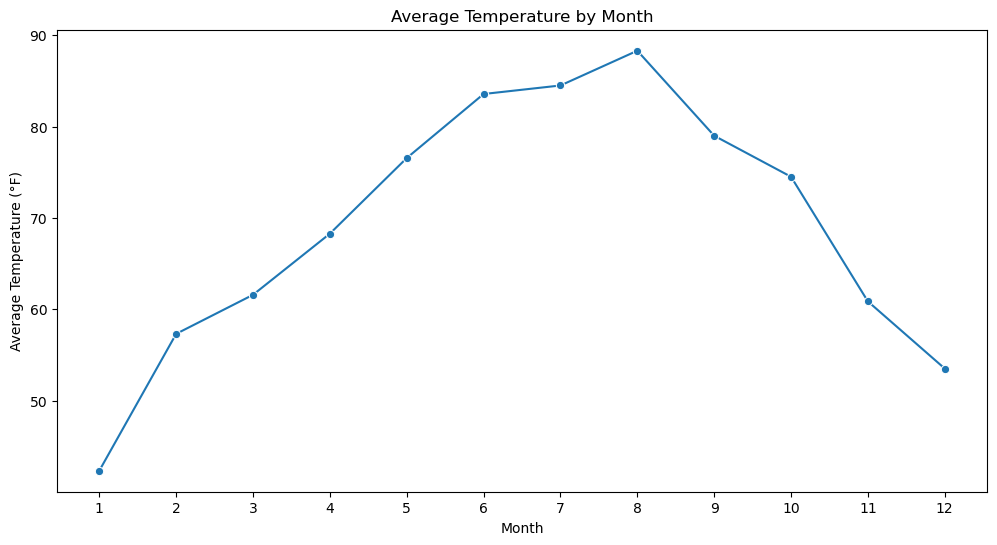

In [34]:
# Markdown: Temperature trend by month
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['month'], y=df['temp'], estimator='mean', ci=None, marker='o', palette='coolwarm')
plt.xlabel("Month")
plt.ylabel("Average Temperature (°F)")
plt.title("Average Temperature by Month")
plt.xticks(range(1, 13))
plt.show()


## Maximum Temperatures for Each Month

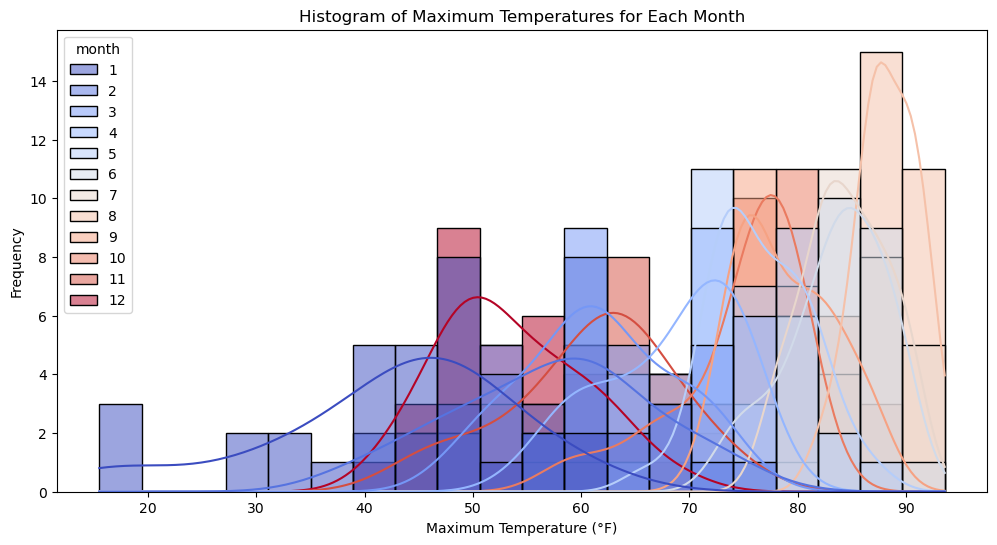

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='temp', hue='month', bins=20, palette='coolwarm', kde=True)
plt.xlabel("Maximum Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Histogram of Maximum Temperatures for Each Month")
plt.show()


## 3-D Plot for Cloud Cover, Visibility, UvIndex

In [36]:

# Drop missing values
subset = df[['cloudcover', 'visibility', 'uvindex']].dropna()

# 3D Scatter Plot
fig = px.scatter_3d(
    subset,
    x='cloudcover',
    y='visibility',
    z='uvindex',
    color='uvindex',
    color_continuous_scale='Viridis',
    title='3D Scatter Plot: Cloud Cover vs Visibility vs UV Index'
)

fig.update_layout(
    scene=dict(
        xaxis_title='Cloud Cover (%)',
        yaxis_title='Visibility (miles)',
        zaxis_title='UV Index'
    )
)

fig.show()


## Correlation Matrix

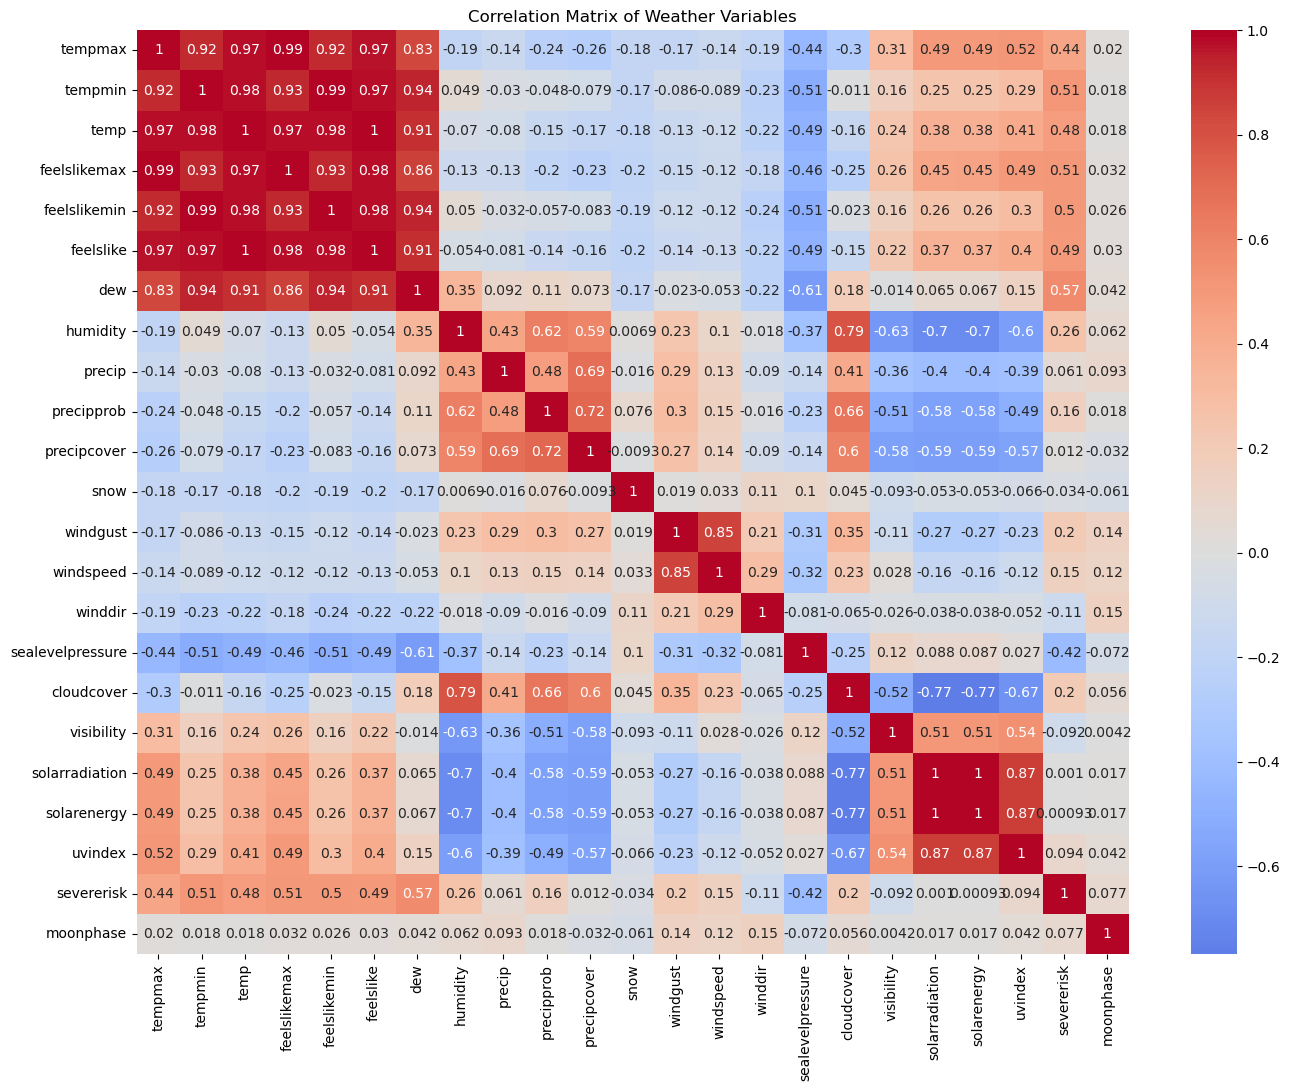

In [37]:
# Calculate correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Weather Variables')
plt.show()

## Box Plot of Numerical Features

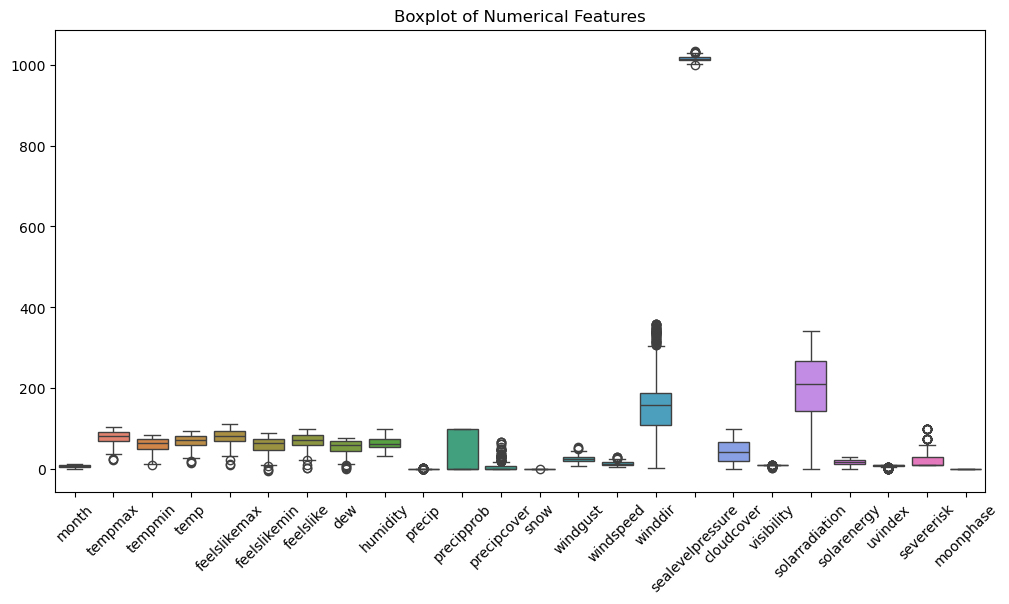

In [38]:
# Markdown: Identifying outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_ftrs])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

## 3D Scatter Plot of Temperature, Wind Speed, and Humidity

In [39]:
# 3D scatter plot of tempmax, windspeed, and humidity
fig = px.scatter_3d(df, x='tempmax', y='windspeed', z='humidity',
                    color='month', title="3D Scatter Plot of Temperature, Wind Speed, and Humidity",
                    labels={"tempmax": "Temperature (°F)", "windspeed": "Wind Speed (mph)", "humidity": "Humidity (%)"})
fig.show()


In [ ]:
import plotly.graph_objects as go

# Create meshgrid
x = np.array(df['tempmax'])
y = np.array(df['windspeed'])
X, Y = np.meshgrid(x, y)
Z = np.log(X * Y) 

# Create 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])


fig.update_layout(title='3D Surface Plot of Temperature and Wind Speed',
                  scene=dict(xaxis_title='Temperature (°F)',
                             yaxis_title='Wind Speed (mph)',
                             zaxis_title='Function of Temp and Wind'))
fig.show()


## Insights

- UV index tends to decrease with increased cloud cover.
- Visibility generally declines when cloud cover is high.
- UV index is higher when visibility is high and cloud cover is low, as expected due to clearer skies.
- There’s a strong correlation between `temp` and `feelslike`.
- Higher cloud cover tends to reduce solar radiation.
- Precipitation is rare but spikes occasionally.
- Temperature and humidity show an inverse relationship.

## References

- https://plotly.com/python/graph-objects/
- https://plotly.com/python/3d-mesh/